In [1]:
import numpy as np
import pandas as pd
import texthero as hero
import os
from newspaper import Article
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import scattertext as st
import spacy
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
CATEGORY_MAPPINGS = {
    "The Hype": "Concerns & Hype",
    "The Panic": "Concerns & Hype",
    "The good coverage": "Advances & Business",
    "Expert Opinions & Discussion within the field": "Expert Opinions & Discussion within the field",
    "Explainers": "Explainers",
    "AI Advances": "Advances & Business",
    "AI Worries": "Concerns & Hype",
    "Advances & Business": "Advances & Business",
    "Concerns & Hype": "Concerns & Hype",
    "Analysis & Policy": "Analysis & Policy",
    "Mini Briefs": "Mini Briefs"
}

In [3]:
def parse_file(file_name):
    with open(file_name,'r') as f:
        current_category = None
        articles = []
        for line in f:
            for c in CATEGORY_MAPPINGS.keys():
                if c in line:
                    current_category = CATEGORY_MAPPINGS[c]
            if current_category and '[' in line and '(' in line:
                title = line.split('[')[1].split(']')[0]
                url = line.split('(')[1].split(')')[0]
                if len(title.split(' '))<4:
                    continue
                print(title)
                if ' - ' in line:
                    excerpt = line.split(' - ')[1].strip()
                else:
                    excerpt = ''
                article = Article(url)
                try: 
                    article.download()
                    article.parse()
                    authors = article.authors
                    date = article.publish_date
                    text = article.text
                    top_image = article.top_image
                    article.nlp()
                    keywords = article.keywords
                    summary = article.summary
                except:
                    authors=None
                    date=None
                    text=None
                    keywords=[]
                    summary=''
                articles.append([str(current_category), 
                                 title, 
                                 date, 
                                 url, 
                                 excerpt, 
                                 authors, 
                                 keywords, 
                                 summary,
                                 text])
    return articles

In [4]:
all_articles = []
category_counts = {}
for file_name in os.listdir('.'):
    if 'py' in file_name or 'this' in file_name:
        continue
    name_parts = file_name.split('.')[0].split('-')
    year = int(name_parts[0])
    month = int(name_parts[1])
    day = int(name_parts[2])
    edition = int(name_parts[3])
    articles = parse_file(file_name)
    all_articles+=articles
    for article in articles:
        if article[0] not in category_counts:
            category_counts[article[0]]=0
        category_counts[article[0]]+=1

DeepMind touts predictive healthcare AI ‘breakthrough’ trained on heavily skewed data
This AI detects 11 types of emotions from a selfie
America is drowning in garbage. Now robots are being put on duty to help solve the recycling crisis
Artificial Intelligence Can Now Create Perfumes, Even Without A Sense Of Smell
NASA's Robotic Arm will Work Just Like a Human Geologist on Mars
This autonomous bicycle shows China’s rising AI chip expertise
A new tool uses AI to spot text written by AI
Science Goes Too Far, Creates AI That Turns You Into an Anime Character
China has started a grand experiment in AI education. It could reshape how the world learns.
Reducing malicious use of synthetic media research
Toby Walsh, A.I. Expert, Is Racing to Stop the Killer Robots
California Police Are Sharing Facial Recognition Databases to ID Suspects
Huge computing power ‘can deliver human-level AI in 5 years’
A team of AI algorithms just crushed humans in a complex computer game
managing to beat a team of 

Stanford’s ‘QuizBot’ – a chatbot that teaches – beats flashcards for learning factual information
Smart Interfaces for Human-Centered AI
Microsoft Word uses AI to improve your writing
Live transcription and captioning in Android are a boon to the hearing-impaired
Collision-Detecting Suitcase, Wayfinding App Help Blind People Navigate Airports
The Future of Journalism: Will Robots Get it Right?
UK faces £90bn bill to retrain one million workers who face losing jobs to robots
Robots Edge Closer to Unloading Trucks in Amazon-Era Milestone
Robots don't destroy jobs, they create them: Amazon
Automakers Are Rethinking the Timetable for Fully Autonomous Cars
Don’t let industry write the rules for AI
Things you only know if you’re an AI research scientist
ChinAI #49: Rebuttal to FT Articles on Western-Chinese AI collaborations
AI Needs More Why
Ethical analysis of the open-sourcing of a state-of-the-art conversational AI
How to build a State-of-the-Art Conversational AI with Transfer Learning


AI shows promise for breast cancer screening
Baidu has a new trick for teaching AI the meaning of language
Japan Loves Robots, but Getting Them to Do Human Work Isn't Easy
Robotics Trends to Watch in 2020: Our 8 Big Predictions
AI creativity will bloom in 2020, all thanks to true web machine learning
While Americans Worry About The AI Uprising, People In Japan Are Learning To Love Their Robots — And Be Loved Back
Bringing artificial intelligence and MIT to middle school classrooms
Cerebras’s Giant Chip Will Smash Deep Learning’s Speed Barrier
ByteDance & TikTok have secretly built a Deepfakes maker
Google DeepMind’s AI-based breast cancer detection is not yet an automatic diagnostician
Don’t Stress About AI Taking Your Job—Humans Will Do That Instead
China should step up regulation of artificial intelligence in finance, think tank says
Illinois says you should know if AI is grading your online job interviews
Top minds in machine learning predict where AI is going in 2020
Ethics of Tech

Technology created deepfakes--does it have a way to stop them, too?
AI License Plate Readers Are Cheaper--So Drive Carefully
Netflix's "The Circle" Gets One Key Thing Right About A.I.
Artificial Intelligence Will Do What We Ask. That's a Problem.
YouTube's algorithm seems to be funneling people to alt-right videos
AI still doesn't have the common sense to understand human language
Government privacy watchdog under pressure to recommend facial recognition ban
I Know Some Algorithms Are Biased--because I Created One
An introduction to (and puns on) Bayesian neural networks
Data Labeling & The Secret Language of Autonomous Flight: Part 1: The Role of Data Labeling in Machine Learning and AI
Alphabet's DeepMind Losses Soared To $570 Million In 2018
China's path to AI domination has a problem: losing talent to the US
Silicon Valley's Latest Unicorn Is Run by a 22-Year-Old
Robot tail developed to balance out human body and stop people from falling over
MIT breaks new ground in AI with 'deep'

How Artificial Intelligence Can Help Pick the Best Depression Treatments for You
Exclusive: Mass layoffs reported after Starsky Robotics fails to find buyer, investors
Why faces don't always tell the truth about feelings
This Technique Uses AI to Fool Other AIs
Moscow deploys facial recognition technology for coronavirus quarantine
Leaked Reports Show EU Police Are Planning a Pan-European Network of Facial Recognition Databases
YOLO Creator Joseph Redmon Stopped CV Research Due to Ethical Concerns
How to know if artificial intelligence is about to destroy civilization
NTSB: Driver in Fatal Tesla Crash Was Playing Video Game
Met Police chief defends facial recognition from 'ill-informed' critics
Should Robots Have a Face?
Reinforcement-learning AIs are vulnerable to a new kind of attack
First analysis of the EU Whitepaper on AI
U.S. Military Adopts New Ethics Guidelines For Artificial Intelligence
Andreessen-Horowitz craps on "AI" startups from a great height
AAAI-20 Fireside Chat with 

Inside the world of AI that forges beautiful art and terrifying deepfakes
Amazon’s own ‘Machine Learning University’ now available to all developers
Helena Sarin: Why Bigger Isn’t Always Better With GANs And AI Art
Montezuma’s Revenge Solved by Go-Explore (Sets Records on Pitfall too)
The 1000 ImageNet Categories inside of BigGAN
Why AI will not replace radiologists
AI researchers are halting work on human-like machines
Woman says her Amazon device recorded private conversation, sent it out to random contact
Google Assistant fired a gun: We need to talk
Mark Zuckerberg, Elon Musk and the Feud Over Killer Robots
Emergency Braking Was Disabled When Self-Driving Uber Killed Woman, Report Says
Emails Show How Amazon is Selling Facial Recognition System to Law Enforcement
Microsoft is creating an oracle for catching biased AI algorithms
Self-driving cars will kill people and we need to accept that
Why We Find Self-Driving Cars So Scary
AI researchers should help with some military work
How 

Deepfake Bot Submissions to Federal Public Comment Websites Cannot Be Distinguished from Human Submissions
BMW shares AI algorithms used in production, available on GitHub
IBM's "elite" data science squad has kickstarted AI for more than 100 companies
IBM Watson exec on AI virtual agent providers: "No big players, except for us"
Intel buys AI chipmaker Habana for $2 billion
Voximplant raises $10 million to automate call campaigns with AI
Samuel L. Jackson Debuts as Alexa's First Celebrity Voice
DeepMind and Google recreate former NFL linebacker Tim Shaw's voice using AI
This startup claims its deepfakes will protect your privacy
Facebook Discovers Fakes That Show Evolution of Disinformation
How I created a deepfake of Mark Zuckerberg and Star Trek's Data
AI Is Biased. Here's How Scientists Are Trying to Fix It
Twelve Million Phones, One Dataset, Zero Privacy
New CCTV cameras could feature AI that can 'read' people's emotions
A US government study confirms most face recognition systems 

There's a new obstacle to landing a job after college: Getting approved by AI
Amazon asks court to halt Microsoft's work on Pentagon 'war cloud'
Microsoft Looms Over the Privacy Debate in Its Home State
Google owner calls for 'proportionate approach' to AI regulation
The EU might ban facial recognition in public for five years
When bias begets bias: A source of negative feedback loops in AI systems
AI Can Do Great Things - If It Doesn't Burn the Planet
Researchers use AI to deblur human faces in photos
How a Kaggle Grandmaster cheated in $25,000 AI contest with hidden code - and was fired from dream SV job
Met police to begin using live facial recognition cameras
Robot tanks: On patrol but not allowed to shoot
The battle for ethical AI at the world's biggest machine-learning conference
Key Volkswagen Exec Admits Full Self-Driving Cars 'May Never Happen'
Patterns of Life: AI and "Actionable Data" in Warfare
RSNA 2019 AI round-up - Hardian Health
We're Banning Facial Recognition. We're M

YouTube thinkfluencer Siraj Raval admits he plagiarized boffins' neural qubit papers – as ESA axes his workshop
No one has a damn clue how many jobs will be lost to automation
Adopting AI in Health Care Will Be Slow and Difficult
California Governor Signs Bill Banning Facial Recognition Tech Use By State's Law Enforcement Agencies
The current state of AI and Deep Learning: A reply to Yoshua Bengio
The promise and peril of AI
More compute is not the solution for AGI
Training real AI with fake data
Neural nets are just people all the way down
Uncertainty Quantification in Deep Learning
To Power AI, This Startup Built a Really, Really Big Chip
Google Assistant's abilities dominate Siri and Alexa, research shows
NVIDIA AI Platform Takes Conversational User Experience To A New Level
Deepfakes Can Help You Dance
Climate Collapse: is AI the Antidote?
Will the world's biggest AI chip find buyers?
Here's China's First Traffic Robot Police, And Its Now On Duty
Facial recognition is now rampant. 

Macy’s Sued for Use of Clearview Facial-Recognition Software
Meet the computer scientist and activist who got Big Tech to stand down
AI bias and the problems of ethical locality
As Its GPT-3 Model Wows the World, OpenAI CEO Suggests ‘the Hype Is Way Too Much’
Artificial Intelligence Could Help Solve America's Impending Mental Health Crisis
It's Sony AI vs. Facebook, Google
Why Is Google Slow-Walking Its Breakthroughs in AI?
Google details DeepMind AI's role in Play Store app recommendations
Scientists have found 142 more ancient etchings in Peru. Now AI will speed up the hunt.
Alphabet's Dream of an 'Everyday Robot' Is Just Out of Reach
Stanford, UMass Amherst develop algorithms that train AI to avoid specific misbehaviors
Using neural machine translation to correct grammatical faux pas in Google Docs
Machine learning has revealed exactly how much of a Shakespeare play was written by someone else
Here's How Knightscope's Security Robots Surveil the Public
AI will disrupt white-collar w

The EU plans to test an AI lie detector at border points
AI for social good
The compute and data moats are dead
Google's LYmph Node Assistant - a Boost, not Replacement, for Doctors
A Visual Exploration of Gaussian Processes
How AI could compose a personalized soundtrack to your life
OpenAI begins publicly tracking AI model efficiency
An AI can simulate an economy millions of times to create fairer tax policy
How A.I. Steered Doctors Toward a Possible Coronavirus Treatment
An AI algorithm inspired by how kids learn is harder to confuse
Written And Directed By: Artificial Intelligence
AI and the Far Right: A History We Can't Ignore
Clearview AI to stop selling controversial facial recognition app to private companies
AI Software Gets Mixed Reviews for Tackling Coronavirus
France is using AI to check whether people are wearing masks on public transport
Pandemic Robots Deployed in Singapore Parks to Remind Humans of Their Own Mortality
Yann LeCun and Yoshua Bengio: Self-supervised learnin

The #BenderRule: On Naming the Languages We Study and Why It Matters
Facebook is betting the next big interface is conversation
Francois Chollet: Keras, Deep Learning, and the Progress of AI
The key to a more human-like Amazon Alexa is unsupervised learning
Deep Learning Pioneer Yoshua Bengio Says AI Is Not Magic And Intel AI Experts Explain Why And How
Atari founder, governor play pong with the future of work in the artificial intelligence age
The End of Starsky Robotics
Should AI help make life-or-death decisions in the coronavirus fight?
You - yes, you - can help AI predict the spread of coronavirus
Microsoft can filter out the sound of you eating potato chips on a conference call
Coronavirus is prompting companies to adopt AI call center solutions
COVID-19 accelerates beauty's demand for AI and AR technology
Infrared AI cameras at polling places could spot voters with a fever to detect potential coronavirus carriers
Five Companies Using AI to Fight Coronavirus
Hospital droid Dilige

AI-Powered "Genderify" Platform Shut Down After Bias-Based Backlash
The problems AI has today go back centuries
The field of natural language processing is chasing the wrong goal
Where Is Robotics Heading? Perspectives From iRobot (Colin Angle), Stanley Black & Decker, And Robots In Service Of The Environment
Beware of these futuristic background checks
Dogs Obey Commands Given by Social Robots
Australia wins first AI Eurovision Song Contest by sampling koalas and kookaburras
Nvidia unveils monstrous A100 AI chip with 54 billion transistors and 5 petaflops of performance
Coronavirus Pandemic: Pittsburgh Airport Becomes First In Nation To Deploy Ultraviolet Cleaning Robots
Microsoft and Intel project converts malware into images before analyzing it
AI advances to better detect hate speech
ThisWordDoesNotExist.com is rewriting the dictionary with the help of AI
Sony's first AI image sensor will make cameras everywhere smarter
Twitter adds former Google VP and A.I. guru Fei-Fei Li to boar

This Year's AI (Artificial Intelligence) Breakthroughs
Global AI Survey: AI proves its worth, but few scale impact
What is the law when AI makes the "decisions"?
What should newsrooms do about deepfakes? These three things, for starters
Artificial intelligence: How to measure the "I" in AI
Dismantling AI Myths and Hype
What Microsoft and Google Are Not Telling You About Their A.I.
Biased Algorithms Are Easier to Fix Than Biased People
Facebook's Head of AI Says the Field Will Soon "Hit the Wall"
Robots in Finance Could Wipe Out Some of Its Highest-Paying Jobs
Magnolia residents' AI-powered surveillance camera tracks people, cars at entrance to neighborhood, experts caution bias
AI takes on popular Minecraft game in machine-learning contest
Exclusive: government blocks full publication of AI review
Yes, China is probably outspending the US in AI - but not on defense
The Doer and The Clarion Caller
Increase model performance by... removing data?
This is how Facebook's AI looks for bad st

In [10]:
print(len(all_articles))
print(category_counts)

1726
{'Expert Opinions & Discussion within the field': 170, 'Analysis & Policy': 181, 'Mini Briefs': 169, 'Advances & Business': 622, 'Concerns & Hype': 452, 'Explainers': 132}


In [11]:
df = pd.DataFrame(all_articles, columns =['category', 'title', 'date', 'url', 'excerpt', 'authors', 'keywords', 'summary', 'text']) 

In [12]:
df['pca'] = (
   df['title']
   .pipe(hero.clean)
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)
hero.scatterplot(df, 'pca', color='category', title="AI News")

In [13]:
df['pca'] = (
   df['excerpt']
   .pipe(hero.clean)
   .pipe(hero.tfidf)
   .pipe(hero.pca)
)
hero.scatterplot(df, 'pca', color='category', title="AI News")

In [17]:
nlp = spacy.load('en')
corpus = st.CorpusFromPandas(df, 
                              category_col='category', 
                              text_col='text',
                              nlp=nlp).build()

Top common words:
['ai', 'openai', 'facebook', 'clearview', 'twitter', 'deepmind', 'neural', 'deepfakes', 'robots', 'waymo', 'deepfake', 'algorithmic', 'artificial', 'algorithms', 'autonomous', 'imagenet', 'youtube', 'robotics', 'coronavirus', 'datasets', 'facial', 'dataset', 'adversarial', 'nlp', 'biases']


In [18]:
print('Top common words:')
print(list(corpus.get_scaled_f_scores_vs_background().index[:25]))

Top common words:
['ai', 'openai', 'facebook', 'clearview', 'twitter', 'deepmind', 'neural', 'deepfakes', 'robots', 'waymo', 'deepfake', 'algorithmic', 'artificial', 'algorithms', 'autonomous', 'imagenet', 'youtube', 'robotics', 'coronavirus', 'datasets', 'facial', 'dataset', 'adversarial', 'nlp', 'biases']


In [20]:
html = st.produce_scattertext_explorer(corpus,
          category='Advances & Business',
          category_name='Advances & Business',
          not_category_name='Other',
          width_in_pixels=1000,)
open("AdvancesViz.html", 'wb').write(html.encode('utf-8'))


15351997

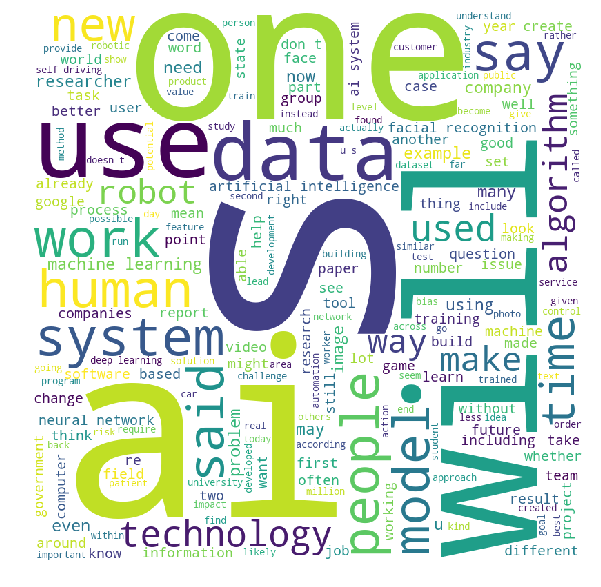

In [24]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for article in all_articles: 
    val = article[-1]
    if val is None:
        continue
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 